Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
# блок импорта
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import mannwhitneyu

In [2]:
# Запросы
DATASET_QUERY1 = '/datasets/query_1.csv'
DATASET_QUERY3 = '/datasets/query_3.csv'
DATASET_QUERY5 = '/datasets/query_last.csv'

# Импортированные данные
df_query1 = pd.read_csv(DATASET_QUERY1)
df_query3 = pd.read_csv(DATASET_QUERY3)
df_query5 = pd.read_csv(DATASET_QUERY5)

In [3]:
# Посмотрим данные первого запроса (на каких самолетах больше всего летали)
df_query1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
# Проверим типы
df_query1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
# Посмотрим данные третьего запроса (среднее количество рейсов в город)
df_query3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
# Проверим типы
df_query3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
# Посмотрим данные последнего запроса (данные по купленным билетам в города по неделям с учетом того, был фестиваль или нет)
df_query5

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [8]:
# Проверим типы
df_query5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [9]:
# В последнем запросе неделя фестиваля float вместо int, преобразуем
df_query5['festival_week'] = df_query5['festival_week'].astype('Int64')
df_query5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null Int64
festival_name    3 non-null object
dtypes: Int64(1), int64(2), object(1)
memory usage: 458.0+ bytes


In [10]:
#Выберем топ-10 городов по количеству рейсов
top10_flights = df_query3.sort_values(by='average_flights', ascending=False).head(10)
top10_flights

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


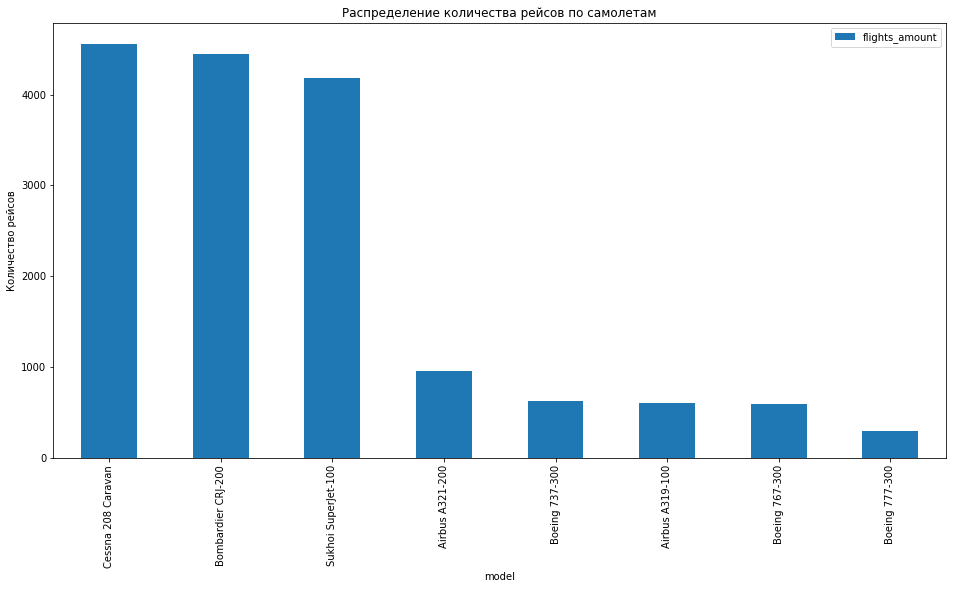

In [11]:
# Построим график модели самолётов и количество рейсов

aircraft_flights = df_query1.sort_values(by='flights_amount', ascending=False).set_index('model')

fig, ax = plt.subplots(1)
ax.set_title('Распределение количества рейсов по самолетам')
ax.set_xlabel('Модели самолетов')
ax.set_ylabel('Количество рейсов')
aircraft_flights.plot(kind='bar', figsize=(16,8), ax=ax)

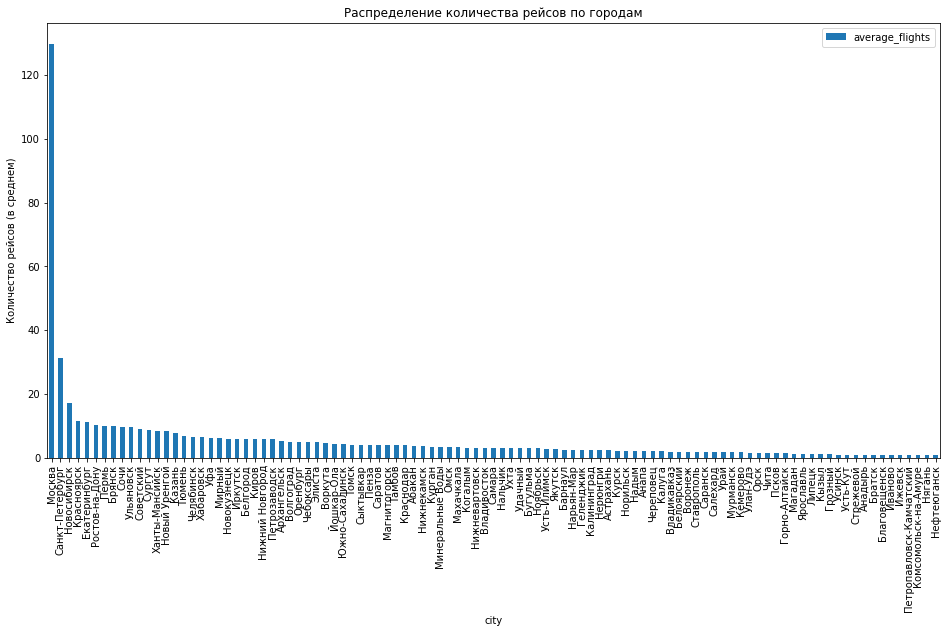

In [12]:
# Построим график зависимости города и количество рейсов
all_flights = df_query3.sort_values(by='average_flights', ascending=False).set_index('city')

fig, ax = plt.subplots(1)
ax.set_title('Распределение количества рейсов по городам')
ax.set_xlabel('Город')
ax.set_ylabel('Количество рейсов (в среднем)')
all_flights.plot(kind='bar', figsize=(16,8), ax=ax)

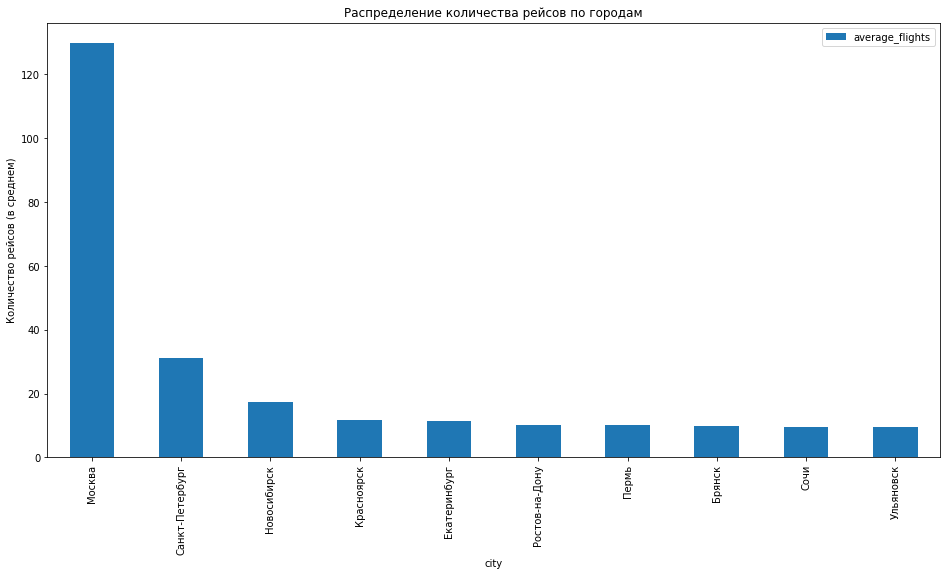

In [13]:
# Изобразим на графике топ 10
top10_flights = top10_flights.set_index('city')

fig, ax = plt.subplots(1)
ax.set_title('Распределение количества рейсов по городам')
ax.set_xlabel('Город')
ax.set_ylabel('Количество рейсов (в среднем)')
top10_flights.plot(kind='bar', figsize=(16,8), ax=ax)

### Промежуточный вывод

    1. По графикам видно, что больше полетов у самолетов малой авиации и дальности
    2. Больше всего рейсов именно в города-миллионники. Вообще, есть определенная корреляция между размером города и количеством рейсов. При этом Москва - безусловный лидер.
    3. Исходя из первого и второго вывода, можно обобщить, что большинство перелетов осуществляется внутри страны, при этом большинство из них сконцентрировано на расстоянии от 1200 до 3000 км (судя по спецификациям самолетов) от Москвы, Санкт-Петербурга и Новосибирска

# 2. Проверка гипотезы

Проверим гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Для начала сформулируем гипотезы H0 и H1.

Гипотеза H0: Средний спрос на билеты во время фестивалей и в обычное время одинаковый (т.е. в среднем они не отличаются)
Гипотеза H1: Средний спрос на билеты во время фестивалей и в обычное время различается (т.е. в среднем есть статистически значимые отличия)

Сформулируем это в коде.

In [14]:
# Перенесем гипотезы в код
H0 = 'Не можем отвергнуть гипотизу - средний спрос на билеты во время фестивалей и в обычное время одинаковый'
H1 = 'Отвергаем нулевую гипотезу, средний спрос на билеты во время фестивалей и в обычное время различается'

# Зададим критический уровень статистической значимости в 5%
# Почему именно в 5 - как одно из широко применяемых значений, точность в 1% в наших вопросах нам не нужна
alpha = 0.05 

# Подготовим выборки
df_festival = df_query5[df_query5['festival_week'].isna()]['ticket_amount']
df_common = df_query5[df_query5['festival_week'].notna()]['ticket_amount']

    Помня о https://drive.google.com/file/d/1SqcimkyF4iGjgT8Yhlmx-tOXV-ejmFev/view мы не можем использовать Т-криттерий стьюдента т.к. выборки сверхмалы и не распределены нормально. Поэтому будем использовать U-тест Манна-Уитни

In [15]:
stat, p = mannwhitneyu(df_festival, df_common)
if p > alpha:
    print(H0)
else:
    print(H1)

Отвергаем нулевую гипотезу, средний спрос на билеты во время фестивалей и в обычное время различается


# Вывод

    Любопытно то, что Т-критетрий Стьюдента при equal_var=True гипотезу не отвергает, однако у нас действительно слишком мало данных, как для его использования, так и для проверки гипотез в целом. Поэтому тут боюсь делать какой-то однозначный вывод. В качестве итогового сделаю вывод о том, что для более корректной проверки гипотезы нам нужно больше данных.
